In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('results.csv')

df2 = df.drop(df[(df.race_score < 1) & (df.race_score > -1) & (df.gender_score < 1) & (df.gender_score > -1)].index)
print(df2.head(10))


   Unnamed: 0        word  race_score  gender_score
0         101     teacher    3.019723     -2.238004
1          56   professor    2.978871     -1.553669
2          99     student    2.842808     -2.898888
3         182     senator    2.814533     -0.169402
4          31    advocate    2.286230     -0.141210
5         245       coach    2.112456      3.269429
6         131  politician    1.901637      0.301666
7         109     manager    1.789818      1.472759
8         184      author    1.789612     -2.258658
9         263      critic    1.757247     -0.237415


In [3]:
scores = df.values.tolist()
print(scores)
bm = []
bw = []
wm = []
ww = []

for score in scores:
  if score[2] < 0 and score[3] > 0:
    bm.append(score)
  elif score[2] < 0 and score[3] < 0:
    bw.append(score)
  elif score[2] > 0 and score[3] < 0:
    ww.append(score)
  elif score[2] > 0 and score[3] > 0:
    wm.append(score)
  else:
    print(score)

[[101, 'teacher', 3.019722589046681, -2.2380042082666254], [56, 'professor', 2.9788713898256742, -1.5536688588842194], [99, 'student', 2.842807834446922, -2.8988878031583862], [182, 'senator', 2.81453290878772, -0.169401984241416], [31, 'advocate', 2.2862296079898194, -0.1412096371607279], [245, 'coach', 2.112455750577918, 3.2694292366393416], [131, 'politician', 1.9016372835882969, 0.3016664125689482], [109, 'manager', 1.789817868402498, 1.472758655243766], [184, 'author', 1.7896122944479895, -2.2586582239431148], [263, 'critic', 1.75724667461337, -0.2374150745746822], [1, 'attorney', 1.746307858570272, -0.5047409466983367], [10, 'artist', 1.5724590668253715, -2.758854461034348], [50, 'lawyer', 1.532446377061997, -1.1127015156326734], [154, 'character', 1.4676974666488871, -1.862785298726737], [12, 'doctor', 1.463140798498206, -1.5489769667528397], [33, 'actor', 1.3804786190994651, -1.5283986677578398], [37, 'writer', 1.3365331987640112, -2.081514121927416], [281, 'physician', 1.33090

In [6]:
def get_top_vals(id_list):
  new_list = []
  for row in id_list:
    row.append(abs(row[2]) + abs(row[3]))
    new_list.append([row[1], row[4]])
  new_list.sort(key = lambda x: x[1])
  new_list.reverse()
  for i in range(0,10):
    print(new_list[i])

print("White woman")
get_top_vals(ww)
print("Black woman")
get_top_vals(bw)
print("White man")
get_top_vals(wm)
print("Black man")
get_top_vals(bm)


White woman
['student', 5.741695637605308]
['teacher', 5.257726797313307]
['professor', 4.532540248709894]
['artist', 4.331313527859719]
['author', 4.048270518391105]
['writer', 3.4180473206914272]
['character', 3.330482765375624]
['editor', 3.0147539503229175]
['doctor', 3.0121177652510456]
['senator', 2.983934893029136]
Black woman
['actress', 3.856802092908112]
['astronaut', 3.5546722365445778]
['photographer', 2.684680274642793]
['detective', 2.6424870614041907]
['officer', 2.621469230161755]
['singer', 2.3092753114690634]
['surgeon', 1.8763023396042544]
['constable', 1.8662493551713208]
['investigator', 1.7035161748437495]
['publicist', 1.681788368747604]
White man
['coach', 5.381884987217259]
['manager', 3.262576523646264]
['president', 2.836940035003413]
['politician', 2.203303696157245]
['lawmaker', 1.4336559918782643]
['legislator', 1.1364511662500498]
['citizen', 1.0472999523058895]
['congressman', 0.9542083575894821]
['dean', 0.7112589280796633]
['commentator', 0.48513639395

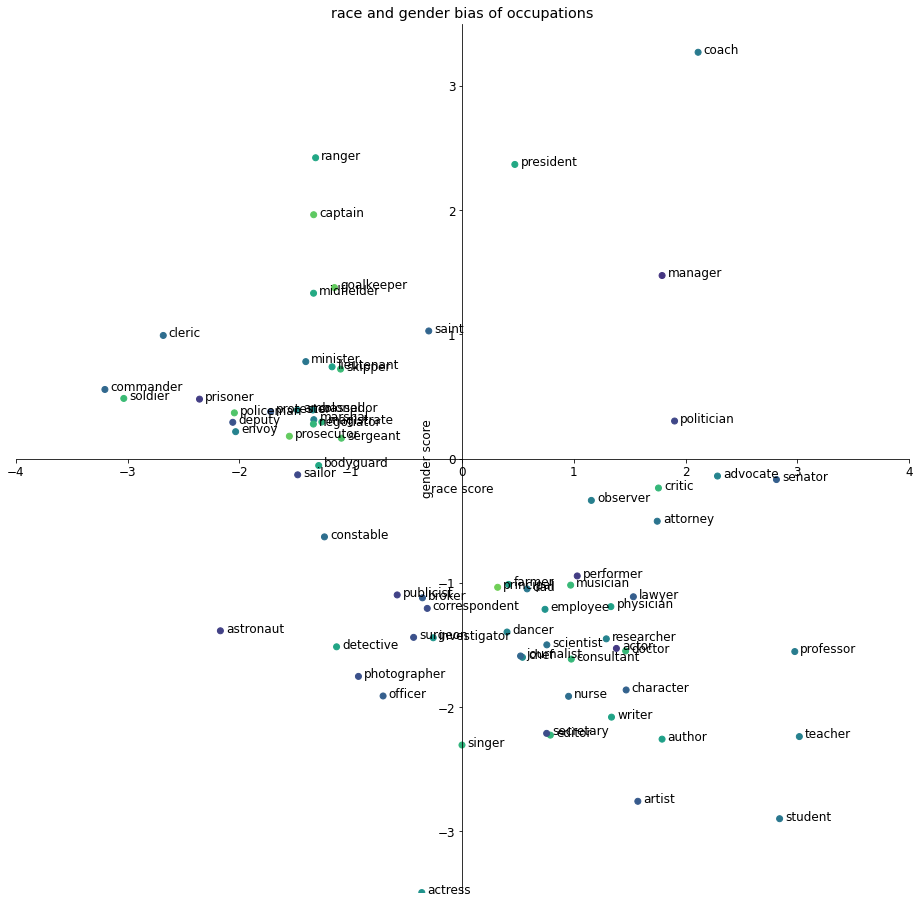

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# size and color:
colors = np.random.uniform(15, 80, len(df2))

# plot
fig, ax = plt.subplots()

fig.set_size_inches(16, 16, forward=True)

plt.rcParams.update({'font.size': 12})

x = df2["race_score"].to_numpy()
y = df2["gender_score"].to_numpy()

ax.scatter(x, y, c=colors, vmin=0, vmax=100)
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.set(xlim=(-4, 4), xticks=np.arange(-4, 5),
       ylim=(-3.5, 3.5), yticks=np.arange(-3, 4))

ax.set_ylabel('gender score')
ax.set_xlabel('race score')

ax.set_title('race and gender bias of occupations')

for i, txt in enumerate(df2["word"]):
    ax.annotate(txt, (x[i]+0.05, y[i]-0.01))

plt.show()

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('results_debiased.csv')

for i,value in enumerate(df.race_score):
  df.race_score[i] = float(df.race_score[i][1:-1])
for i,value in enumerate(df.gender_score):
  df.gender_score[i] = float(df.gender_score[i][1:-1])

df2 = df.drop(df[(df.race_score < 1) & (df.race_score > -1) & (df.gender_score < 1) & (df.gender_score > -1)].index)

print(df2.head(10))

FileNotFoundError: ignored

In [9]:
scores = df.values.tolist()
print(scores)
bm = []
bw = []
wm = []
ww = []

for score in scores:
  if score[2] > 0 and score[3] > 0:
    bm.append(score)
  elif score[2] > 0 and score[3] < 0:
    bw.append(score)
  elif score[2] < 0 and score[3] < 0:
    ww.append(score)
  elif score[2] < 0 and score[3] > 0:
    wm.append(score)
  else:
    print(score)

def get_top_vals(id_list):
  new_list = []
  for row in id_list:
    row.append(abs(row[2]) + abs(row[3]))
    new_list.append([row[1], row[4]])
  new_list.sort(key = lambda x: x[1])
  new_list.reverse()
  for i in range(0,10):
    print(new_list[i])

print("White woman")
get_top_vals(ww)
print("Black woman")
get_top_vals(bw)
print("White man")
get_top_vals(wm)
print("Black man")
get_top_vals(bm)

[[50, 'teacher', 3.0280704, -2.28397577], [227, 'professor', 2.98732414, -1.60021884], [38, 'student', 2.83009648, -2.82888617], [21, 'senator', 2.80217383, -0.10134004], [188, 'advocate', 2.28873337, -0.154998], [31, 'coach', 2.13823649, 3.12745393], [110, 'politician', 1.8971024, 0.32664005], [262, 'manager', 1.85074189, 1.13724836], [203, 'attorney', 1.78375041, -0.71093869], [61, 'author', 1.76887885, -2.14447848], [180, 'critic', 1.73062359, -0.09080091], [76, 'lawyer', 1.55950194, -1.2616974], [250, 'artist', 1.55612068, -2.66887835], [2, 'doctor', 1.47148342, -1.59492008], [100, 'character', 1.43698208, -1.69363466], [118, 'actor', 1.39320508, -1.59848378], [70, 'physician', 1.34632856, -1.27720003], [254, 'writer', 1.32439528, -2.01467], [151, 'researcher', 1.27677518, -1.37871516], [72, 'observer', 1.15476798, -0.33086627], [137, 'performer', 1.03115988, -0.95416496], [273, 'athlete', 0.99259055, -0.62116084], [204, 'consultant', 0.99126597, -1.69760638], [29, 'director', 0.98

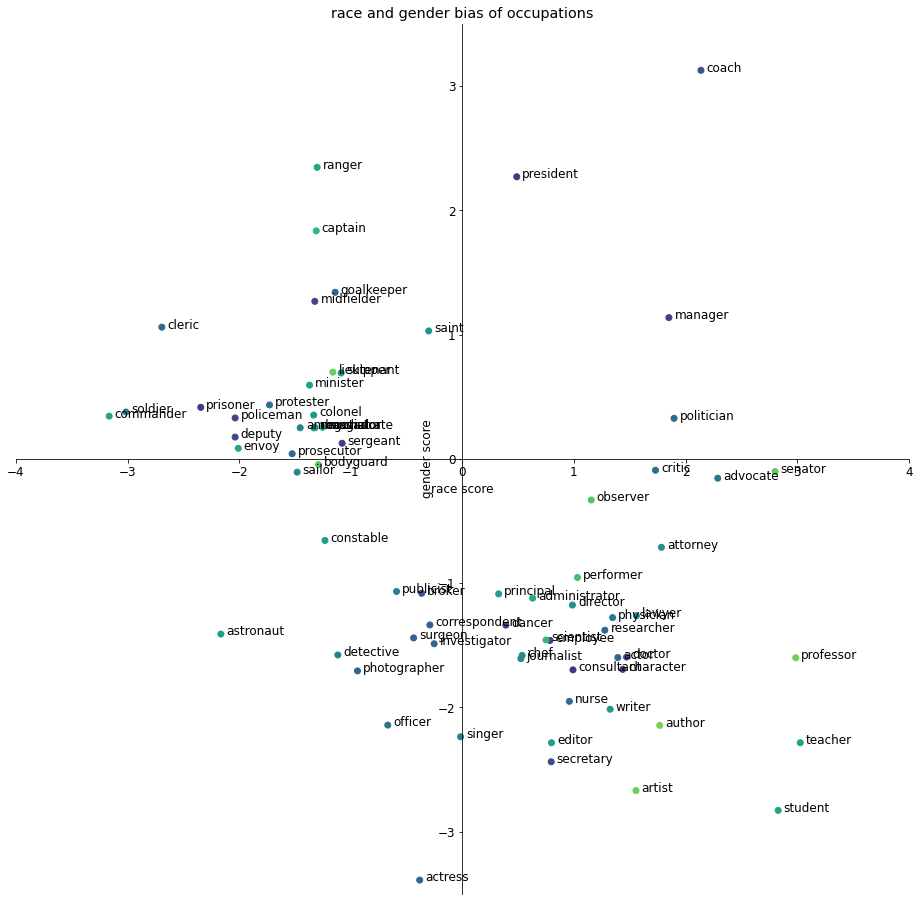

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# size and color:
colors = np.random.uniform(15, 80, len(df2))

# plot
fig, ax = plt.subplots()

fig.set_size_inches(16, 16, forward=True)

plt.rcParams.update({'font.size': 12})

x = df2["race_score"].to_numpy()
y = df2["gender_score"].to_numpy()

ax.scatter(x, y, c=colors, vmin=0, vmax=100)
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.set(xlim=(-4, 4), xticks=np.arange(-4, 5),
       ylim=(-3.5, 3.5), yticks=np.arange(-3, 4))

ax.set_ylabel('gender score')
ax.set_xlabel('race score')

ax.set_title('race and gender bias of occupations')

for i, txt in enumerate(df2["word"]):
    ax.annotate(txt, (x[i]+0.05, y[i]-0.01))

plt.show()